<a href="https://colab.research.google.com/github/mervebudakk/python/blob/main/09_Morfolojik_%C4%B0%C5%9Flemler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. MORFOLOJİK İŞLEMLER
 Biyolojinin canlıların şekil ve yapıları ile ilgilenen dalına morfoloji (biçim bilim) adı verilmektedir. Matematiksel morfoloji ise temel küme işlemlerine dayanan, imgedeki sınırlar (borders), iskelet (skeleton) gibi yapıların tanımlanması ve çıkartılması, gürültü giderimi, bölütleme gibi uygulamalar için gerekli bir araçtır. İmge işlemede genellikle, morfolojik süzgeçleme, inceltme (thinning), budama (pruning) gibi ön/son işlem olarak da sıkça kullanılırlar. Gri tonlu imgeler üzerinde de yapılabileceği gibi, genellikle ikili imgeler üzerinde yapılan işlemlerdir.Uygulama alanları :
* Görüntülerin ön işlenmesinde ya da son işlenmesi adımlarında
* Sınır, kenar gibi görüntü bileşenlerinin ayrıştırılmasında


##1.1. İkili Morfolojik İşlemler
İkili görüntülerde her pikselin (x,y) değeri 0 veya 1 olabilir. İkili görüntü genellikle siyah ve beyaz olarak görülür.Temel ikili morfolojik işlemler :
* Genleşme İşlemi
* Aşınma İşlemi
* Açma İşlemi
* Kapama İşlemi

Temel ikili morfolojik işlemlerin matematiksel ifadeleri aşağıdaki denklemlerle tanımlanmaktadır :


In [ ]:
#Google Drive'ınızı bağlamak için kullanılır.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from PIL import Image
from IPython.display import display

#PIL modülünden Image kütüphanesi uygulamaya dahil edilir.

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/denklem.png')

##1.1.1. Genleşme İşlemi
İkili imgedeki nesneyi büyütmeye ya da kalınlaştırmaya yarayan morfolojik işlemdir.Sayısal bir imgeyi genişletmek imgeyi yapısal elemanla kesiştiği bölümler kadar büyütmektir. İşlenecek imgenin her bir pikseli, yapısal elemanın merkez noktasına oturtularak genleşme işlemi yapılmaktadır. Kalınlaştırma işleminin nasıl yapılacağını yapısal eleman belirler. Genleşme işlemi uygulanmış bir imgede, imge içerisindeki deliklerin ve boşlukların doldurulması ve köşe noktasının yumuşaması gözlenir.


In [ ]:
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/genlesme.png')

##1.1.1.1 Genleşme İşlemi Uygulaması

morfolojik.png dosyasının orjinal hali:


In [ ]:
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/morfolojik.png')

Genleşme İşlemi İçin Python Kodu :

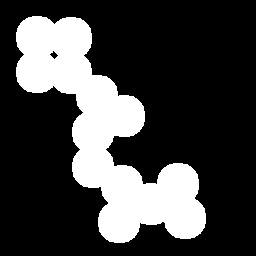

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests

#Morfolojik operasyonları içeren tüm kodlar, öncelikle yukarıdaki fonksiyonları ve yapısal elemanı oluşturmak için numpy paketi kullanmak için cv2 paketini içe aktarmalıdır.

url = 'https://raw.githubusercontent.com/mervebudakk/python/master/images/morfolojik.png'
response = requests.get(url)
with open('morfolojik.png', 'wb') as f:
    f.write(response.content)

img=cv2.imread('morfolojik.png', 0)

#Ardından, resmin okunması gerekiyor. Bu cv2.imread (dosya adı, flag) işlevi tarafından yapılır. Flag = 0 gri tonlamalı bir görüntüyü döndürür.

kernel=np.ones((5,5),np.uint8)

#Morfolojik işlem için yapılandırma elemanı aşağıdaki kod kullanılarak oluşturulur.Şimdi gri tonlamalı görüntüde morfolojik işlemler yapacağız.

dilation=cv2.dilate(img,kernel,iterations=1)

#Bunun için cv2.dilate () işlevini kullanıyoruz.

cv2_imshow(dilation)

#Değişiklikleri görmek ve karşılaştırmak için değiştirilmiş resmi görüntüleyebiliriz. Bunun için cv2.imshow (windowName, img) işlevini kullanıyoruz. Örneğin, aşınmış görüntüyü görmek istiyorsanız, bu kod kullanılır.

cv2.imwrite("/content/new_morfolojik.png",dilation)

#Alternatif olarak, değiştirilmiş görüntüyü cv2.imwrite (isim, img) işleviyle de kaydedebiliriz.

# 1.1.2 Aşınma İşlemi
İkili imgedeki nesneyi küçültmeye ya da inceltmeye yarayan morfolojik işlemdir. Aşınma işlemi tam anlamıyla olmasa da bir bakıma genleşme işleminin tersi gibidir. İmge içerisindeki nesneler ufalır, delik varsa genişler, bağlı nesneler ayrılma eğilimi gösterir.


In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/aşınma.png')

# 1.1.2.1 Aşınma İşlemi Uygulaması
09_morfolojik.png dosyasının orjinal hali:


In [ ]:
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/morfolojik.png')

Aşınma İşlemi İçin Python Kodu :


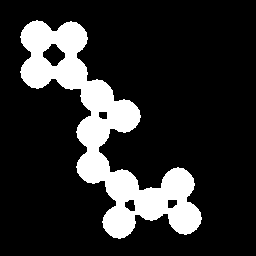

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests

#Morfolojik operasyonları içeren tüm kodlar, öncelikle yukarıdaki fonksiyonları ve yapısal elemanı oluşturmak için numpy paketi kullanmak için cv2 paketini içe aktarmalıdır.

url = 'https://raw.githubusercontent.com/mervebudakk/python/master/images/morfolojik.png'
response = requests.get(url)
with open('morfolojik.png', 'wb') as f:
    f.write(response.content)

img=cv2.imread('morfolojik.png', 0)

#Ardından, resmin okunması gerekiyor. Bu cv2.imread (dosya adı, bayrak) işlevi tarafından yapılır. Flag = 0 gri tonlamalı bir görüntüyü döndürür.

kernel=np.ones((5,5),np.uint8)

#Morfolojik işlem için yapılandırma elemanı aşağıdaki kod kullanılarak oluşturulur.Şimdi gri tonlamalı görüntüde morfolojik işlemler yapacağız.

erosion=cv2.erode(img,kernel,iterations=1)

#Bunun için cv2.erode () işlevini kullanıyoruz.

cv2_imshow(erosion)

#Değişiklikleri görmek ve karşılaştırmak için değiştirilmiş resmi görüntüleyebiliriz. Bunun için cv2.imshow (windowName, img) işlevini kullanıyoruz. Örneğin, aşınmış görüntüyü görmek istiyorsanız, bu kod kullanılır.

cv2.imwrite("/content/morfolojik_asinma.png",erosion)

#Alternatif olarak, değiştirilmiş görüntüyü cv2.imwrite (isim, img) işleviyle de kaydedebiliriz.

# 1.1.3. Açma İşlemi
İmge üzerinde aşınma işleminin hemen ardından genleşme işlenmesi uygulanması sonucu açma işlemi elde edilir. İmge içerisindeki nesneler ve nesneler arasındaki boşluklar yapısal elemanın büyüklüğüne göre temizlenir. İmge üzerinde kalan nesneler orijinal imgedeki şekillerinden biraz daha küçük hale gelir. Açma işlemi ile birbirine yakın iki nesne imgede fazla değişime sebebiyet vermeden ayrılmış olurlar.


In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/acma.png')

# 1.1.3.1 Açma İşlemi Uygulaması
morfolojik.png dosyasının orjinal hali:



In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/morfolojik2.png')

Açma İşlemi İçin Python Kodu :

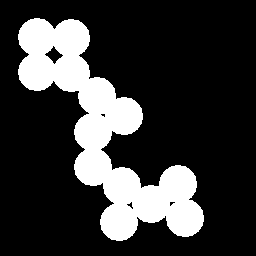

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests
from io import BytesIO
from PIL import Image

#Morfolojik operasyonları içeren tüm kodlar, öncelikle yukarıdaki fonksiyonları ve yapısal elemanı oluşturmak için numpy paketi kullanmak için cv2 paketini içe aktarmalıdır.

url = 'https://raw.githubusercontent.com/mervebudakk/python/master/images/morfolojik2.png'
response = requests.get(url)

image_bytes = BytesIO(response.content)

# PIL ile resmi açıyoruz ve numpy dizisine dönüştürüyoruz

pil_image = Image.open(image_bytes)
np_array = np.array(pil_image)

# NumPy dizisini cv2.imread'e vererek görüntü okuma

img = cv2.cvtColor(np_array, cv2.COLOR_RGB2BGR)

#Ardından, resmin okunması gerekiyor. Bu cv2.imread (dosya adı, bayrak) işlevi tarafından yapılır. Flag = 0 gri tonlamalı bir görüntüyü döndürür.
kernel=np.ones((5,5),np.uint8)

#Morfolojik işlem için yapılandırma elemanı aşağıdaki kod kullanılarak oluşturulur.Şimdi gri tonlamalı görüntüde morfolojik işlemler yapacağız.

opening=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

#Bunun için cv2.erode () işlevini kullanıyoruz.

cv2_imshow(opening)

#Değişiklikleri görmek ve karşılaştırmak için değiştirilmiş resmi görüntüleyebiliriz. Bunun için cv2.imshow (windowName, img) işlevini kullanıyoruz. Örneğin, aşınmış görüntüyü görmek istiyorsanız, bu kod kullanılır.

cv2.imwrite("/content/morfolojik_acilma.jpg",opening)

#Alternatif olarak, değiştirilmiş görüntüyü cv2.imwrite (isim, img) işleviyle de kaydedebiliriz.


# 1.1.4. Kapama İşlemi
İmge üzerinde genleşme işleminin hemen ardından aşınma işleminin uygulanması sonucu kapama işlemi elde edilir. Dolayısıyla birbirine yakın iki nesne imgede fazla değişiklik yapılmadan birbirine bağlanmış olur. Kapama işlemi sonunda imge içerisindeki noktalar birbirlerini kapatırlar, imgedeki ana hatlar daha da dolgunlaşır. Genleşme işlemine benzer bir şekilde kapama işleminde de birbirine yakın olan noktalar arasındaki boşluklar dolar ve noktalar birleşir. İmge üzerinde kalan nesneler, orijinal imgedeki şekillerine bürünürler.


In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/kapama.png')

# 1.1.4.1 Kapama İşlemi Uygulaması

09_kapama.png dosyasının orjinal hali :


In [ ]:
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/morfolojik3.png')

Kapama İşlemi İçin Python Kodu :


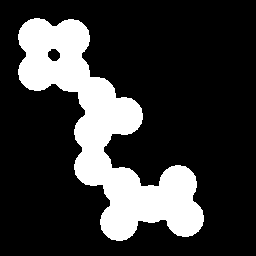

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests
from io import BytesIO
from PIL import Image

#Morfolojik operasyonları içeren tüm kodlar, öncelikle yukarıdaki fonksiyonları ve yapısal elemanı oluşturmak için numpy paketi kullanmak için cv2 paketini içe aktarmalıdır.

url = 'https://raw.githubusercontent.com/mervebudakk/python/master/images/morfolojik3.png'
response = requests.get(url)

image_bytes = BytesIO(response.content)

# PIL ile resmi açıyoruz ve numpy dizisine dönüştürüyoruz

pil_image = Image.open(image_bytes)
np_array = np.array(pil_image)

# NumPy dizisini cv2.imread'e vererek görüntü okuma

img = cv2.cvtColor(np_array, cv2.COLOR_RGB2BGR)

#Ardından, resmin okunması gerekiyor. Bu cv2.imread (dosya adı, bayrak) işlevi tarafından yapılır. Flag = 0 gri tonlamalı bir görüntüyü döndürür.

kernel=np.ones((5,5),np.uint8)

#Morfolojik işlem için yapılandırma elemanı aşağıdaki kod kullanılarak oluşturulur.Şimdi gri tonlamalı görüntüde morfolojik işlemler yapacağız.

closing=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

#Bunun için cv2.erode () işlevini kullanıyoruz.

cv2_imshow(closing)

#Değişiklikleri görmek ve karşılaştırmak için değiştirilmiş resmi görüntüleyebiliriz. Bunun için cv2.imshow (windowName, img) işlevini kullanıyoruz. Örneğin, aşınmış görüntüyü görmek istiyorsanız, bu kod kullanılır.

cv2.imwrite("/content/morfolojik_kapanma.jpg",closing)

#Alternatif olarak, değiştirilmiş görüntüyü cv2.imwrite (isim, img) işleviyle de kaydedebiliriz.



# 1.2. Yapısal Eleman
Yapısal eleman olarak isimlendirilen yapı, imge üzerinde yapacağımız işleme ve yapmak istediğimiz uygulamaya göre istenilen boyutlarda ve istenilen şekilde hazırlanmış küçük ikilik bir imgedir. Yapısal eleman farklı geometrik şekillerden herhangi biri olabilir. En çok kullanılanları kare, dikdörtgen ve dairedir.


In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/yapısal_eleman1.png')

# 1.3. Gri Seviyeli Morfolojik İşlemler

Gri seviyeli bir imgenin B yapısal elemanı ile genleşme işlemi denklem 11 ile tanımlanmaktadır. Şekil 1.6’da gri seviyeli imgeye 15x15 kare yapısal elamanı ile genleşme işlemi uygulanmış hali gösterilmektedir.


In [ ]:
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/denklem2.png')

Burada Df ve Db, sırasıyla f ve b’nin tanım bölgeleridir. Genleşme işleminden sonra imge daha parlaktır. Gri seviyeli aşınma işlemi denklemi aşağıda tanımlanmıştır .Şekil 1.6'da gri seviyeli imgeye 15x15 kare yapısal elemanı ile aşınma işlemi uygulanmış hali gösterilmektedir.


In [ ]:
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/denklem3.png')

Aşınma işleminden sonra imge daha koyudur.


In [ ]:
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/sekil1.6.png')

Gri seviyeli imgelerde yapılan morfolojik işlemler sonucunda;  Gri seviyeli imgede uygulanan genleşme işlemi, imge daha parlak bir hal alır.  İmgede koyu tonlu bölgelerle çevrili olan parlak bölgeler genişlerken, parlak bölgelerle çevrili koyu tonlu bölgeler zayıflamakta, hatta yapısal elemanın ve koyu tonlu bölgenin boyutuna bağlı olarak kaybolabilmektedir. Gri seviyeli imgede uygulanan aşınma işlemi, imge daha koyu bir hal alır.  İmgede koyu tonlu bölgelerle çevrili olan parlak bölgeler daralırken, parlak bölgelerle çevrili koyu tonlu bölgeler genişlemektedir.


##1.3.1 Gri Seviyeli Aşınma Ve Genleşme Uygulamaları :
cicek_gray.png dosyasının orjinal hali :



In [ ]:
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/cicek_gray.png')

Gri Aşınma İşleminin Python Kodu :



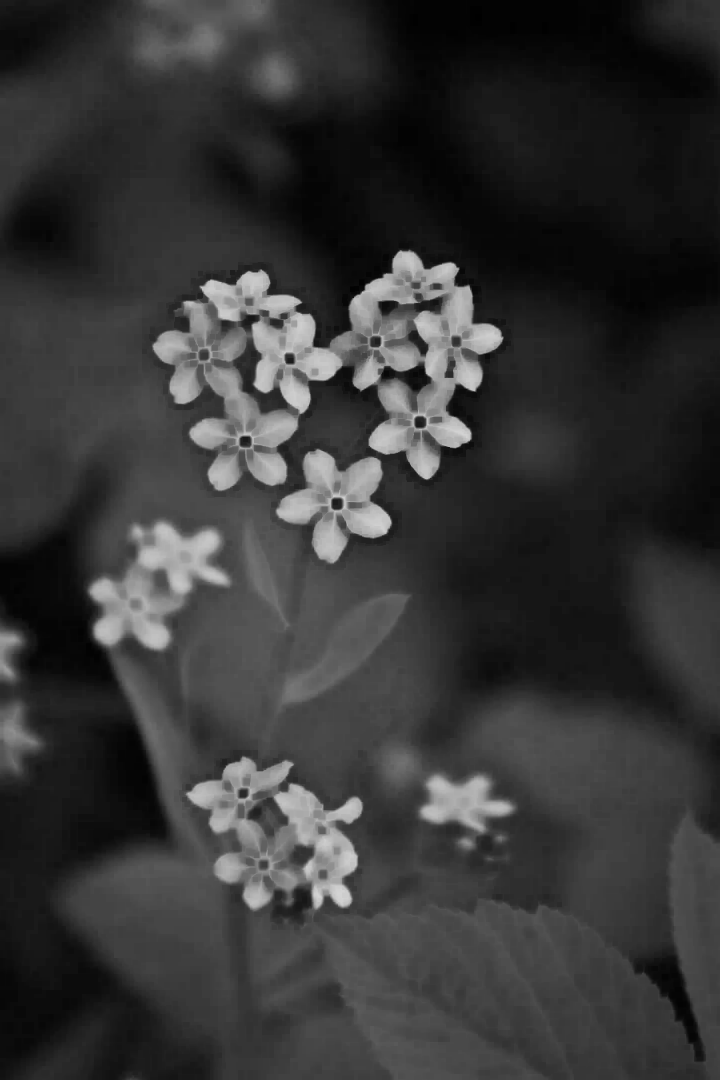

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests
from io import BytesIO
from PIL import Image

url = 'https://raw.githubusercontent.com/mervebudakk/python/master/images/cicek_gray.png'
response = requests.get(url)

image_bytes = BytesIO(response.content)

pil_image = Image.open(image_bytes)
np_array = np.array(pil_image)

img = cv2.cvtColor(np_array, cv2.COLOR_RGB2BGR)

kernel=np.ones((5,5),np.uint8)

erosion=cv2.erode(img,kernel,iterations=1)

cv2_imshow(erosion)

cv2.imwrite("/content/gri_asinma.jpg",erosion)

Gri Genleşme İşleminin Python Kodu :

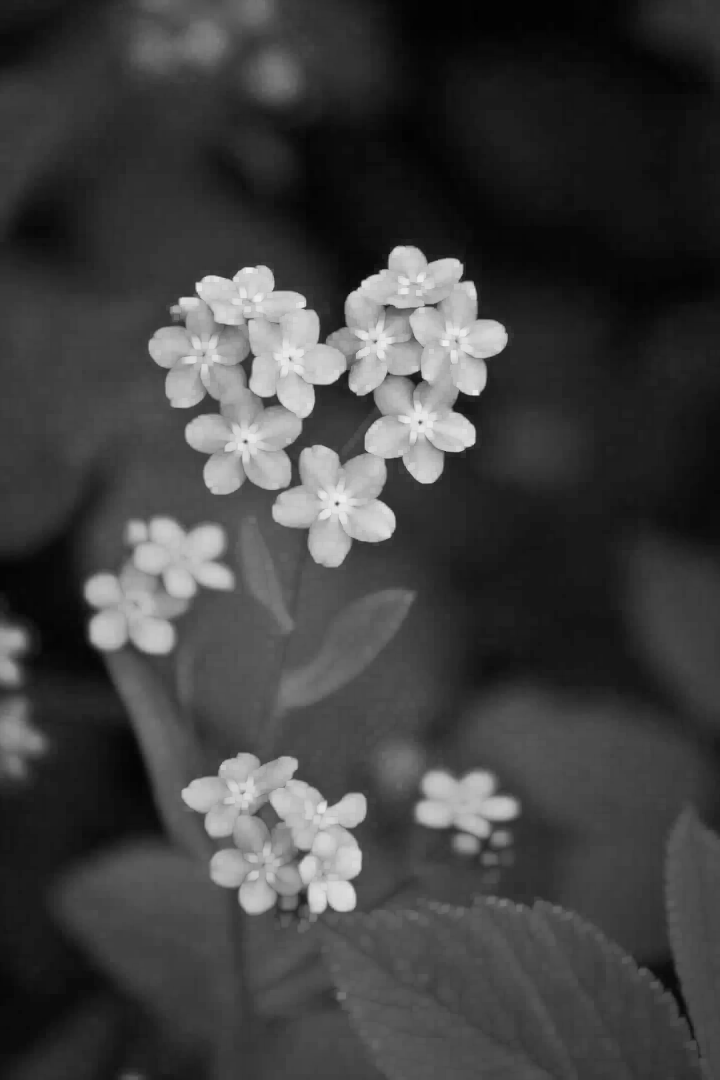

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests
from io import BytesIO
from PIL import Image

url = 'https://raw.githubusercontent.com/mervebudakk/python/master/images/cicek_gray.png'
response = requests.get(url)

image_bytes = BytesIO(response.content)

pil_image = Image.open(image_bytes)
np_array = np.array(pil_image)

img = cv2.cvtColor(np_array, cv2.COLOR_RGB2BGR)

kernel=np.ones((5,5),np.uint8)

dilation=cv2.dilate(img,kernel,iterations=1)

cv2_imshow(dilation)

cv2.imwrite("/content/gri_genlesme.jpg",dilation)

# 1.4 Ortalama Süzgeç
Ortalama süzgeç, imgedeki gürültüyü azaltmak için yaygın olarak kullanılan, basit bir süzgeç tipidir. Ortalama süzgeçleme, gürültülü imge üzerindeki her bir pikselin değeri o piksele komşu olan diğer piksellere ait değerlerin ortalaması ile değiştirilir. Bu çalışmada, aritmetik ortalama süzgeci kullanılmıştır. Ortalama süzgeci, katlama süzgeç olarak da düşünmek mümkündür. Gürültü çeşidine ve büyüklüğüne göre kullanılacak maske tipi seçilmelidir. Genellikle 3X3’lük maskeler kullanılmaktadır fakat daha büyük gürültü temizleme işlemleri için daha büyük boyutta maskeler kullanılmalıdır. Küçük maskelerin imgeye ardışıl bir şekilde uygulanması koşuluyla, büyük bir maskenin imge üzerinde yarattığı etkiye benzer bir etki oluşturması mümkündür.


In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mervebudakk/python/master/images/suzgec_maskesi.png')

Ortalama süzgeçte, seçilen farklı boyutlarda ve değerlerde ortalama süzgeç maskesine göre oluşturulan yeni ortalama piksel değerleri ile imgedeki gürültülerin eliminasyonu sağlanır. Ortalama süzgecin dezavantajları:

1. İmgede çok düşük değere sahip olan bir piksel, o piksele komşu olan bütün piksellerin ortalamasını büyük oranda etkiler ve dolayısıyla işlemlerde yanılsamaya neden olur.

2. Süzgeç kerneli belirgin kenarlar üzerinde işlem yaptığında, gürültü pikseller için gösterdiği etkiyi kenarlarda da gösterebilecek ve böylece imgedeki belirgin detaylar ve kenarlar da bulanıklaşabilecektir. Eğer işlem sonundaki imgede belirgin kenarlar önem arz ediyorsa, bu durum problem yaratabilecektir.
